In [2]:
import numpy as np
import pandas as pd
from PIL import Image


import os

In [3]:
df_text = pd.read_csv('data/Flipkart/dataText.csv')
df_text.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [4]:
df_text.shape

(1050, 15)

In [ ]:

image_folder = 'data/Flipkart/Images'

image_data = []

for file_name in os.listdir(image_folder):
    
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
       
        file_path = os.path.join(image_folder, file_name)

       
        img = Image.open(file_path)
        img_array = np.array(img)

    
        image_data.append({'file_name': file_name, 'image': img_array})


df_images = pd.DataFrame(image_data)


df_images.head()

c:\Users\misss\Formation\Projets\Classification\ClassifiezAutomatiquement\.venv\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


file_name  \
0  009099b1f6e1e8f893ec29a7023153c4.jpg   
1  0096e89cc25a8b96fb9808716406fe94.jpg   
2  00cbbc837d340fa163d11e169fbdb952.jpg   
3  00d84a518e0550612fcfcba3b02b6255.jpg   
4  00e966a5049a262cfc72e6bbf68b80e7.jpg   

                                               image  
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
4  [[[254, 254, 252], [254, 254, 252], [254, 254,...

# Texte

## Nettoyage

In [6]:
# Liste des colonnes à éliminer
columns_to_drop = ["pid", "retail_price", "discounted_price", "image", 
                   "is_FK_Advantage_product", "product_rating", "overall_rating", "brand", "crawl_timestamp"]

df_text = df_text.drop(columns=columns_to_drop)
print("Colonnes non pertinentes supprimées. Voici l'aperçu des données nettoyées :")
df_text.head()


Colonnes non pertinentes supprimées. Voici l'aperçu des données nettoyées :


uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [7]:
# Extraire les mots après l'url
df_text['url_words'] = df_text['product_url'].str.replace('http://www.flipkart.com/', '', regex=False)
df_text['url_words'] = df_text['url_words'].str.split('-')

print("Extraction des mots de l'URL :")
df_text[['product_url', 'url_words']].head()

Extraction des mots de l'URL :


product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                           url_words  
0  [elegance, polyester, multicolor, abstract, ey...  
1  [sathiyas, cotton, bath, towel/p/itmegfzhxbyuc...  
2  [eurospa, cotton, terry, face, towel, set/p/it...  
3  [santosh, royal, fashion, cotton, printed, kin...  
4  [jaipur, print, cotton, floral, king, sized, d...

In [8]:
import ast

# Fonction pour extraire la première catégorie
def extract_first_category(category_tree):
    try:
       
        category_list = ast.literal_eval(category_tree)
       
        first_category = category_list[0].split(' >> ')[0]
        return first_category
    except (ValueError, IndexError, SyntaxError):
        return None  


df_text['category'] = df_text['product_category_tree'].apply(extract_first_category)


print("Première catégorie extraite :")
df_text[['product_category_tree', 'category']].head()



Première catégorie extraite :


product_category_tree         category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing

In [9]:
import json

# Fonction pour nettoyer la spécification
def clean_specifications(spec_string):
    if isinstance(spec_string, str):
        spec_string = spec_string.replace("=>", ":")
        try:
            spec_dict = json.loads(spec_string)
            return {item['key']: item['value'] for item in spec_dict.get('product_specification', []) if 'key' in item and 'value' in item}
        except (ValueError, KeyError, TypeError, json.JSONDecodeError):
            return None 
    else:
        return None  

df_text['cleaned_specifications'] = df_text['product_specifications'].apply(clean_specifications)

df_text[['product_specifications', 'cleaned_specifications']].head()


product_specifications  \
0  {"product_specification"=>[{"key"=>"Brand", "v...   
1  {"product_specification"=>[{"key"=>"Machine Wa...   
2  {"product_specification"=>[{"key"=>"Material",...   
3  {"product_specification"=>[{"key"=>"Brand", "v...   
4  {"product_specification"=>[{"key"=>"Machine Wa...   

                              cleaned_specifications  
0  {'Brand': 'Elegance', 'Designed For': 'Door', ...  
1  {'Machine Washable': 'Yes', 'Material': 'Cotto...  
2  {'Material': 'Cotton Terry', 'Design': 'SHUVAM...  
3  {'Brand': 'SANTOSH ROYAL FASHION', 'Machine Wa...  
4  {'Machine Washable': 'Yes', 'Brand': 'Jaipur P...

In [10]:
# Liste des colonnes à supprimer
columns_to_drop = ["product_url", "product_category_tree", "product_specifications"]
df_text = df_text.drop(columns=columns_to_drop)

print("Colonnes supprimées. Aperçu du dataframe :")
df_text.head()


Colonnes supprimées. Aperçu du dataframe :


uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                           url_words         category  \
0  [elegance, polyester, multicolor, abstract, ey...  Home Furnishing   
1  [sathiyas, cotton, bath, towel/p/itmegfzhxbyuc...        Baby Care   
2  [eurospa, cotton, terry, face, towel, set/p/it...        Baby Care   
3  [santosh, royal, fashion, cotton, printed, kin...  Home Furnishing   
4  [jaipur, print, cotton, floral, king, sized, d...  Home Furnishing   

                              cleaned_specifications  
0  {'Brand': 'Elegance', 'Designed For': 'Door', ...  
1  {'Machine Washable': 'Yes', 'Material': 'Cotto...  
2  {'Material': 'Cotton Terry', 'Design': 'SHUVAM...  
3  {'Brand': 'SANTOSH ROYAL FASHION', 'Machine Wa...  
4  {'Machine Washable': 'Yes', 'Brand': 'Jaipur P...

In [11]:
import nltk
nltk.download('stopwords', download_dir='C:/Users/misss/Formation/Projets/Classification/ClassifiezAutomatiquement/nltk_data')
nltk.download('punkt_tab', download_dir='C:/Users/misss/Formation/Projets/Classification/ClassifiezAutomatiquement/nltk_data')
nltk.download('wordnet', download_dir='C:/Users/misss/Formation/Projets/Classification/ClassifiezAutomatiquement/nltk_data')
nltk.download('word_tokenize', download_dir='C:/Users/misss/Formation/Projets/Classification/ClassifiezAutomatiquement/nltk_data')
nltk.data.path.append('C:/Users/misss/Formation/Projets/Classification/ClassifiezAutomatiquement/nltk_data')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import os

[nltk_data] Downloading package stopwords to C:/Users/misss/Formation/
[nltk_data]     Projets/Classification/ClassifiezAutomatiquement/nltk_
[nltk_data]     data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:/Users/misss/Formation/
[nltk_data]     Projets/Classification/ClassifiezAutomatiquement/nltk_
[nltk_data]     data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:/Users/misss/Formation/Pr
[nltk_data]     ojets/Classification/ClassifiezAutomatiquement/nltk_da
[nltk_data]     ta...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


In [ ]:
from nltk.tokenize import word_tokenize


Tokens: ['This', 'is', 'a', 'test', 'sentence', 'to', 'check', 'tokenization', '.']


In [13]:
# Initialiser le lemmatizer et les stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fonction de prétraitement et de tokenisation
def preprocess_and_tokenize(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        print(tokens)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return tokens
    return []


df_text['description_tokens'] = df_text['description'].apply(preprocess_and_tokenize)

print("Tokenisation des descriptions terminée :")
df_text[['description', 'description_tokens']].head()


['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtainelegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiorsthis', 'curtain', 'is', 'made', 'from', '100', 'high', 'quality', 'polyester', 'fabricit', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'metal', 'ringit', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'lovingthis', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparancegive', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'the', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'these', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in'

description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                  description_tokens  
0  [key, feature, elegance, polyester, multicolor...  
1  [specification, sathiyas, cotton, bath, towel,...  
2  [key, feature, eurospa, cotton, terry, face, t...  
3  [key, feature, santosh, royal, fashion, cotton...  
4  [key, feature, jaipur, print, cotton, floral, ...

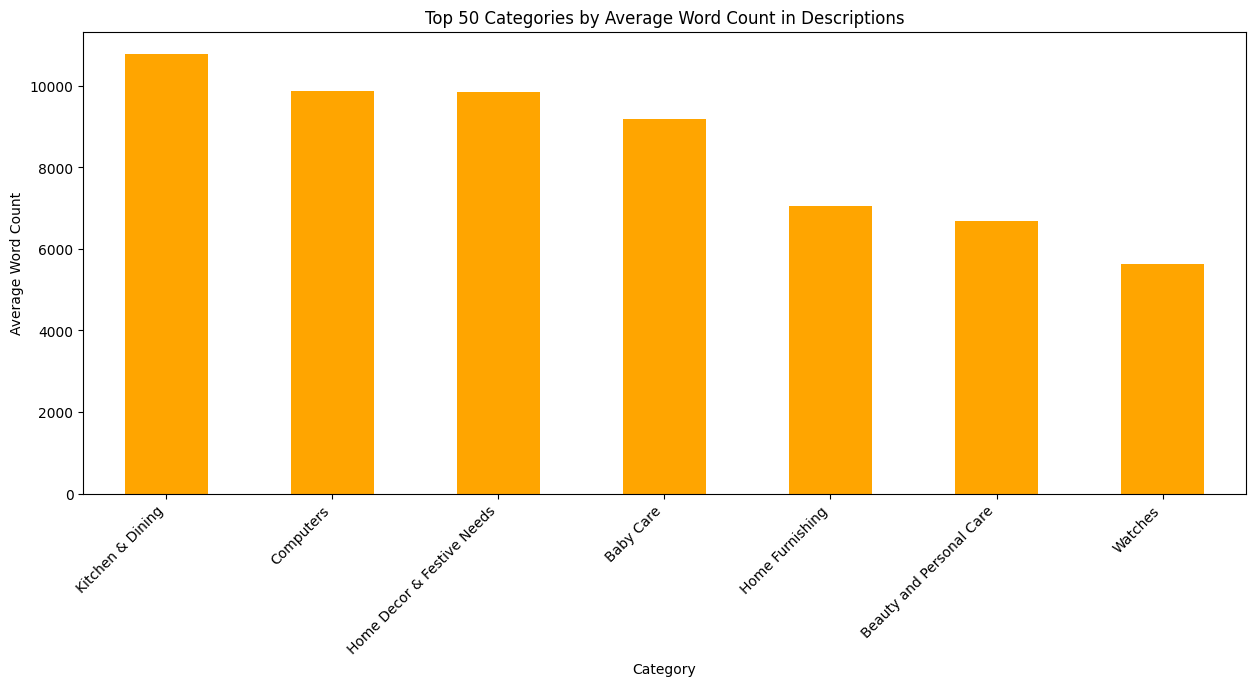

In [14]:

import pandas as pd
import matplotlib.pyplot as plt


df_text['word_count'] = df_text['description_tokens'].apply(len)  


category_word_count = df_text.groupby('category')['word_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
category_word_count.plot(kind='bar', color='orange')
plt.title("Top 50 Categories by Average Word Count in Descriptions")
plt.xlabel("Category")
plt.ylabel("Average Word Count")
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1500x800 with 0 Axes>

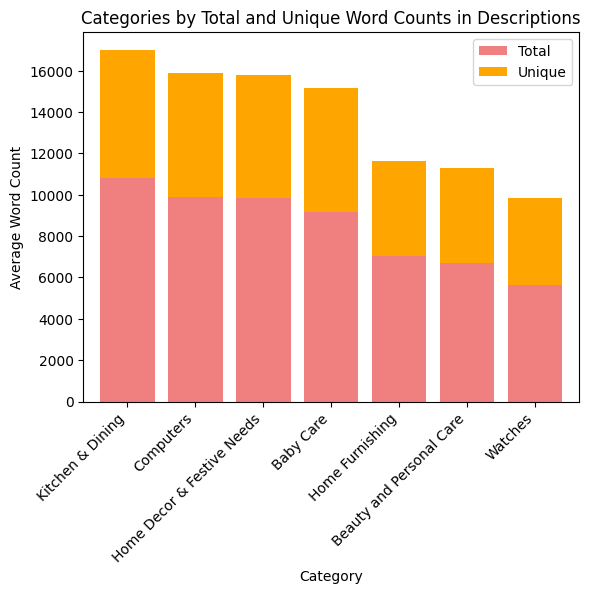

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def calculate_word_counts(description_tokens):
    total_count = len(description_tokens)
    unique_count = len(set(description_tokens))
    return total_count, unique_count

df_text[['total_word_count', 'unique_word_count']] = df_text['description_tokens'].apply(
    lambda tokens: pd.Series(calculate_word_counts(tokens))
)


category_word_counts = df_text.groupby('category')[['total_word_count', 'unique_word_count']].sum().sort_values(
    by='total_word_count', ascending=False
)


plt.figure(figsize=(15, 8))
category_word_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'orange'], width=0.8)
plt.title("Categories by Total and Unique Word Counts in Descriptions")
plt.xlabel("Category")
plt.ylabel("Average Word Count")
plt.xticks(rotation=45, ha='right')
plt.legend(["Total", "Unique"], loc='upper right')
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


df_text['description_text'] = df_text['description_tokens'].apply(
    lambda tokens: ' '.join([token for token in tokens if not token.isdigit()])
)

#Word Count
count_vectorizer = CountVectorizer()
count_features = count_vectorizer.fit_transform(df_text['description_text'])


print("Bag-of-Words avec Count Vectorizer (Word Count)")
print(f"Nombre de descriptions: {count_features.shape[0]}, Nombre de mots uniques: {count_features.shape[1]}")
print("Exemples de mots:", count_vectorizer.get_feature_names_out()[:10])


Bag-of-Words avec Count Vectorizer (Word Count)
Nombre de descriptions: 1050, Nombre de mots uniques: 5609
Exemples de mots: ['01433cmgy' '01727lpln' '01741lpln' '01784bmly' '03918cmly' '045lbs'
 '04615cmgy' '05712lmly' '05tg16624raw' '05tg87020nblue']


In [17]:

# TF-IDF 
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df_text['description_text'])


print("\nBag-of-Words avec TF-IDF Vectorizer")
print(f"Nombre de descriptions: {tfidf_features.shape[0]}, Nombre de mots uniques: {tfidf_features.shape[1]}")
print("Exemples de mots:", tfidf_vectorizer.get_feature_names_out()[:10])



Bag-of-Words avec TF-IDF Vectorizer
Nombre de descriptions: 1050, Nombre de mots uniques: 5609
Exemples de mots: ['01433cmgy' '01727lpln' '01741lpln' '01784bmly' '03918cmly' '045lbs'
 '04615cmgy' '05712lmly' '05tg16624raw' '05tg87020nblue']


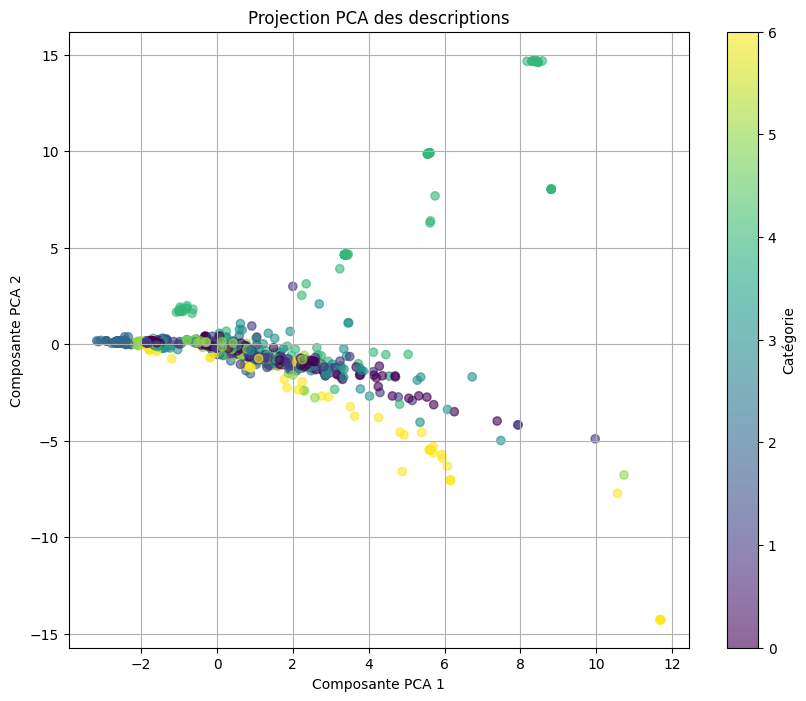

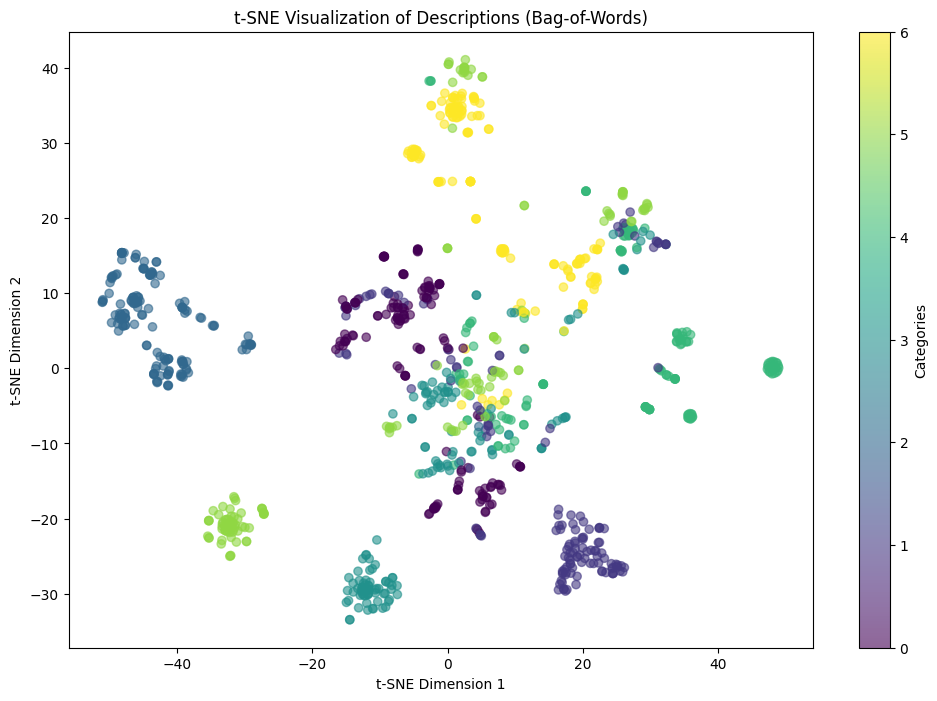

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


pca = PCA(n_components=50)
count_features_pca = pca.fit_transform(count_features.toarray())

# Ajout des deux premières composantes principales au DataFrame
df_text['pca_1'] = count_features_pca[:, 0]
df_text['pca_2'] = count_features_pca[:, 1]

# Création du scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_text['pca_1'], 
    df_text['pca_2'], 
    c=df_text['category'].factorize()[0], 
    cmap='viridis', 
    alpha=0.6
)

# Ajout de la légende et des axes
plt.colorbar(scatter, label='Catégorie')
plt.title("Projection PCA des descriptions")
plt.xlabel("Composante PCA 1")
plt.ylabel("Composante PCA 2")
plt.grid(True)
plt.show()


tsne = TSNE(n_components=2, random_state=42)
count_features_tsne = tsne.fit_transform(count_features_pca)


df_text['tsne_1'] = count_features_tsne[:, 0]
df_text['tsne_2'] = count_features_tsne[:, 1]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_text['tsne_1'], df_text['tsne_2'], c=df_text['category'].factorize()[0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Categories')
plt.title('t-SNE Visualization of Descriptions (Bag-of-Words)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

num_categories = df_text['category'].nunique()
kmeans = KMeans(n_clusters=num_categories, random_state=42)
df_text['cluster'] = kmeans.fit_predict(count_features)


print(df_text[['category', 'cluster']].head(10))

          category  cluster
0  Home Furnishing        1
1        Baby Care        1
2        Baby Care        1
3  Home Furnishing        1
4  Home Furnishing        1
5          Watches        6
6          Watches        6
7          Watches        6
8          Watches        6
9          Watches        6


In [55]:
# Adjusted Rand Index pour comparer les clusters aux catégories réelles
ari_score = adjusted_rand_score(df_text['category'], df_text['cluster'])
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

# Silhouette Score pour évaluer la cohésion des clusters
silhouette_avg = silhouette_score(count_features, df_text['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Adjusted Rand Index (ARI): 0.0862
Silhouette Score: -0.0495


# TF IDF

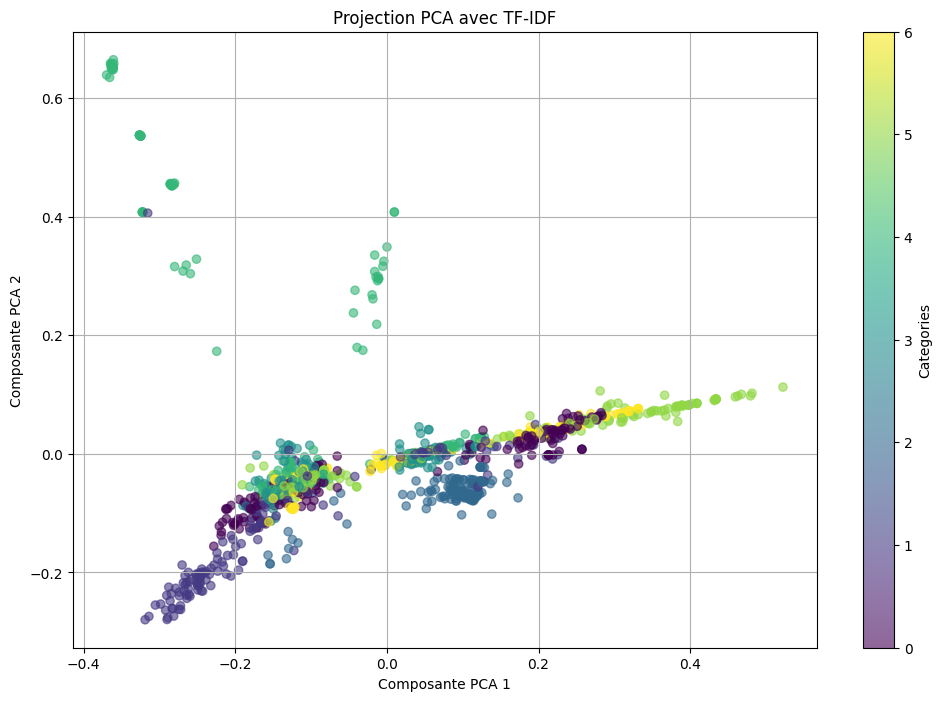

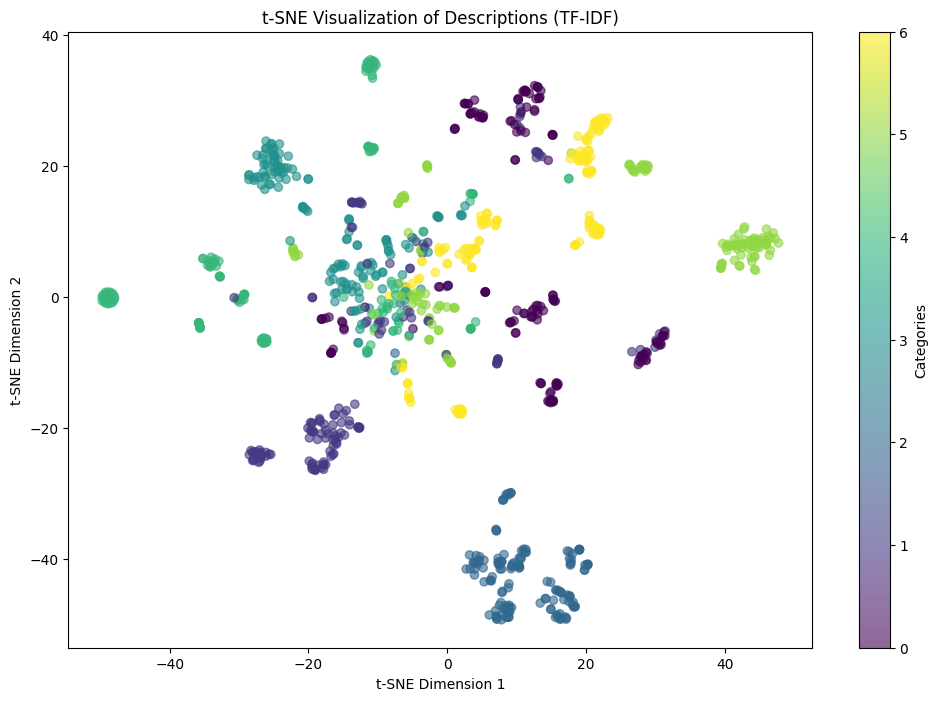

In [58]:

pca = PCA(n_components=50)
tfidf_features_pca = pca.fit_transform(tfidf_features.toarray())

# Ajouter les deux premières composantes principales dans le DataFrame
df_text['pca_1_tfidf'] = tfidf_features_pca[:, 0]
df_text['pca_2_tfidf'] = tfidf_features_pca[:, 1]

# Créer le graphique
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_text['pca_1_tfidf'], 
    df_text['pca_2_tfidf'], 
    c=df_text['category'].factorize()[0], 
    cmap='viridis', 
    alpha=0.6
)

# Ajouter une légende et des labels d'axes
plt.colorbar(scatter, label='Categories')
plt.title('Projection PCA avec TF-IDF')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.grid(True)
plt.show()


tsne = TSNE(n_components=2, random_state=42)
tfidf_features_tsne = tsne.fit_transform(tfidf_features_pca)

df_text['tsne_1_tfidf'] = tfidf_features_tsne[:, 0]
df_text['tsne_2_tfidf'] = tfidf_features_tsne[:, 1]


plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_text['tsne_1_tfidf'], df_text['tsne_2_tfidf'], c=df_text['category'].factorize()[0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Categories')
plt.title('t-SNE Visualization of Descriptions (TF-IDF)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Appliquer K-means avec un nombre de clusters égal au nombre de catégories uniques
num_categories = df_text['category'].nunique()
kmeans = KMeans(n_clusters=num_categories, random_state=42)
df_text['cluster'] = kmeans.fit_predict(tfidf_features)


print(df_text[['category', 'cluster']].head(10))


          category  cluster
0  Home Furnishing        3
1        Baby Care        3
2        Baby Care        4
3  Home Furnishing        3
4  Home Furnishing        3
5          Watches        6
6          Watches        6
7          Watches        3
8          Watches        6
9          Watches        6


In [21]:
# Adjusted Rand Index pour comparer les clusters aux catégories réelles
ari_score = adjusted_rand_score(df_text['category'], df_text['cluster'])
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

# Silhouette Score pour évaluer la cohésion des clusters
silhouette_avg = silhouette_score(tfidf_features, df_text['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")


Adjusted Rand Index (ARI): 0.2122
Silhouette Score: 0.0318


# Embeddings avec Word2Vec

In [22]:
from gensim.models import Word2Vec
import numpy as np

# Entraînement d'un modèle Word2Vec sur les tokens de toutes les descriptions
model_w2v = Word2Vec(sentences=df_text['description_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Fonction pour obtenir le vecteur moyen de chaque description
def get_avg_word2vec(tokens, model, vector_size):
   
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) > 0:
        
        return np.mean(word_vectors, axis=0)
    else:
       
        return np.zeros(vector_size)


df_text['description_embeddings'] = df_text['description_tokens'].apply(lambda tokens: get_avg_word2vec(tokens, model_w2v, 100))

print(df_text['description_embeddings'].iloc[0])
print("Dimension de l'embedding :", len(df_text['description_embeddings'].iloc[0]))


[-0.20064062  0.20251283  0.00155287  0.30813223 -0.05136887 -0.4731666
 -0.00838275  0.62239885 -0.29254633  0.01790854 -0.27527922 -0.44411364
  0.04227433  0.2234893   0.02232652 -0.5089504  -0.11760043 -0.72320336
 -0.14619213 -0.4356923   0.0037665  -0.07004502 -0.33765703 -0.38205022
 -0.04580177 -0.17887335 -0.24482274 -0.25917602 -0.1305622  -0.07162315
  0.23583059  0.11388087  0.09234706  0.07007544 -0.11035581  0.3900472
 -0.06949922 -0.6170318  -0.07262932 -0.8052757   0.08177013 -0.3830741
  0.28050283 -0.03347169  0.3061329  -0.2131375  -0.20366079 -0.216432
  0.3178767   0.11165733 -0.03957778 -0.23244488 -0.08024488  0.11049567
 -0.02741441  0.38191536  0.3023586   0.04714123 -0.18245119  0.25503537
  0.5597432   0.27399316 -0.21487638 -0.21879534 -0.37660637  0.19622357
  0.19685444  0.20547532 -0.2516327   0.44412225 -0.17637597  0.07477393
  0.29165348 -0.03784556  0.5974139   0.22445278 -0.04816268 -0.0029187
 -0.27586275  0.250652   -0.08536288  0.04390439 -0.57009

## visualisation

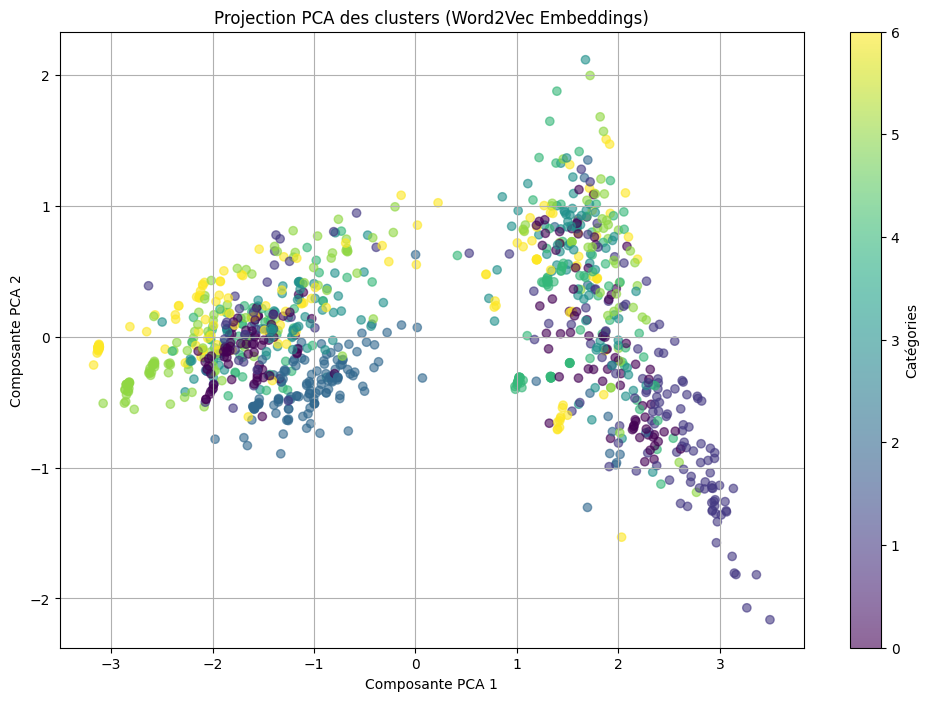

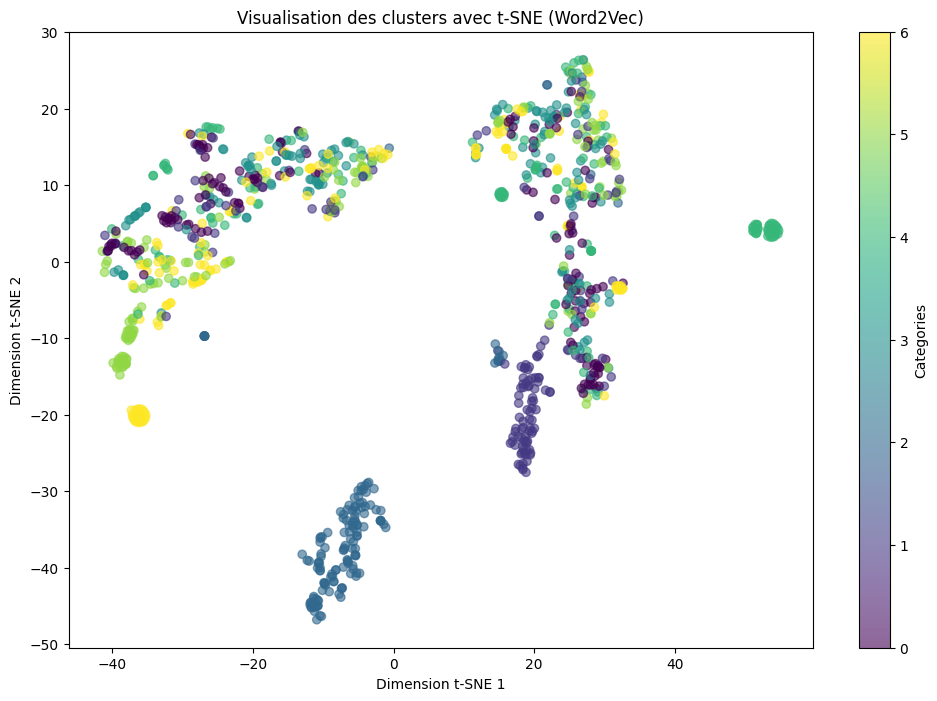

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


embeddings_matrix = np.stack(df_text['description_embeddings'].values)


pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings_matrix)

# Ajouter les deux premières composantes principales dans le DataFrame
df_text['pca_1_embeddings'] = embeddings_pca[:, 0]
df_text['pca_2_embeddings'] = embeddings_pca[:, 1]

# Créer le graphique
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_text['pca_1_embeddings'], 
    df_text['pca_2_embeddings'], 
    c=df_text['category'].factorize()[0], 
    cmap='viridis', 
    alpha=0.6
)

# Ajouter une légende et des labels d'axes
plt.colorbar(scatter, label='Catégories')
plt.title('Projection PCA des clusters (Word2Vec Embeddings)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.grid(True)
plt.show()


tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

df_text['tsne_1'] = embeddings_tsne[:, 0]
df_text['tsne_2'] = embeddings_tsne[:, 1]


plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_text['tsne_1'], df_text['tsne_2'], c=df_text['category'].factorize()[0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Categories')
plt.title("Visualisation des clusters avec t-SNE (Word2Vec)")
plt.xlabel("Dimension t-SNE 1")
plt.ylabel("Dimension t-SNE 2")
plt.show()


## Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

num_categories = df_text['category'].nunique()

kmeans = KMeans(n_clusters=num_categories, random_state=42)
df_text['cluster'] = kmeans.fit_predict(embeddings_pca)  


print(df_text[['category', 'cluster']].head(10))


          category  cluster
0  Home Furnishing        4
1        Baby Care        6
2        Baby Care        1
3  Home Furnishing        1
4  Home Furnishing        1
5          Watches        2
6          Watches        2
7          Watches        4
8          Watches        2
9          Watches        2


In [25]:

ari_score = adjusted_rand_score(df_text['category'], df_text['cluster'])
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

silhouette_avg = silhouette_score(embeddings_pca, df_text['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")


Adjusted Rand Index (ARI): 0.1488
Silhouette Score: 0.3878


# BERT

In [26]:
import os
from sentence_transformers import SentenceTransformer

# Disabling SSL verification temporarily
os.environ['CURL_CA_BUNDLE'] = ''  # Disable SSL certificate verification

c:\Users\misss\Formation\Projets\Classification\ClassifiezAutomatiquement\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


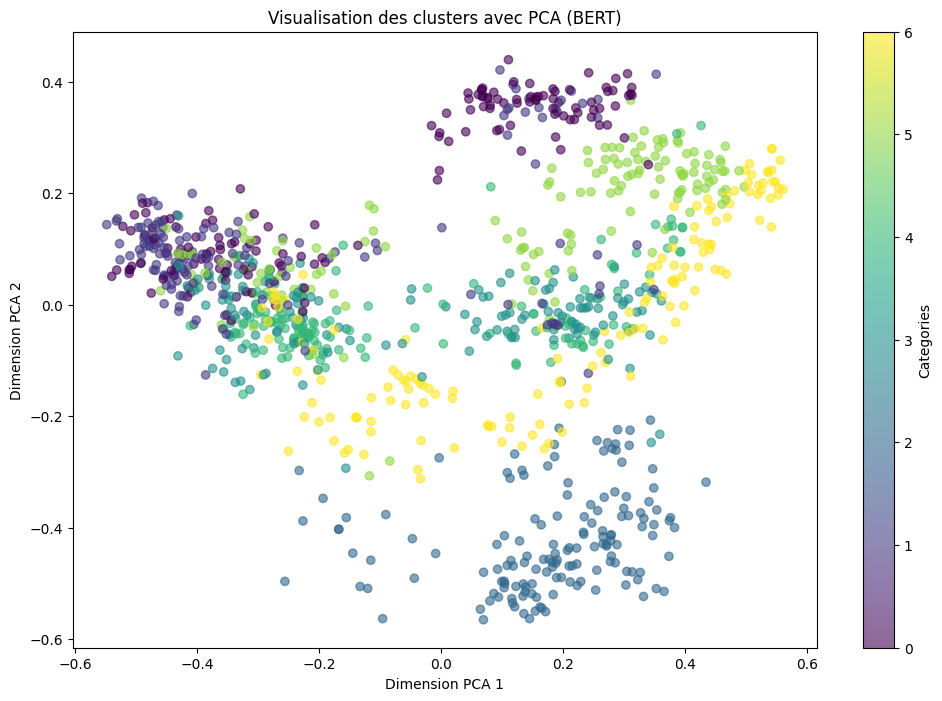

c:\Users\misss\Formation\Projets\Classification\ClassifiezAutomatiquement\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


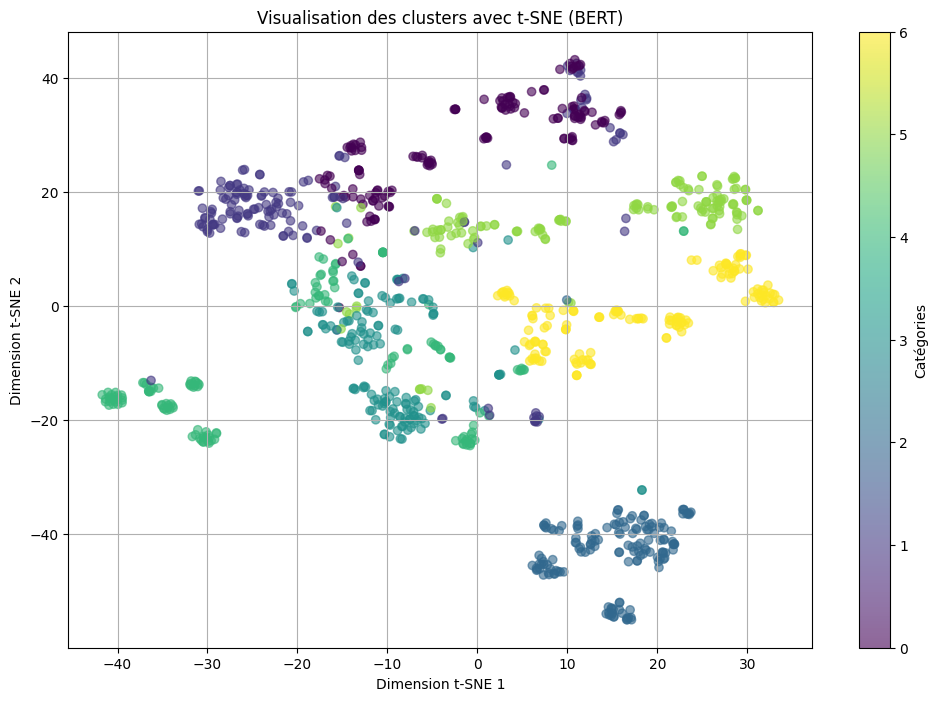

In [60]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Charger le modèle BERT de sentence-transformers
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2") 


df_text['bert_embeddings'] = df_text['description_text'].apply(lambda x: model.encode(x))


embeddings_matrix = np.stack(df_text['bert_embeddings'].values)


pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings_matrix)

# Visualisation avec PCA en 2D
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings_pca)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=df_text['category'].factorize()[0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Categories')
plt.title("Visualisation des clusters avec PCA (BERT)")
plt.xlabel("Dimension PCA 1")
plt.ylabel("Dimension PCA 2")
plt.show()


tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

# Ajouter les deux dimensions t-SNE dans le DataFrame
df_text['tsne_1'] = embeddings_tsne[:, 0]
df_text['tsne_2'] = embeddings_tsne[:, 1]

# Visualisation avec t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_text['tsne_1'], 
    df_text['tsne_2'], 
    c=df_text['category'].factorize()[0], 
    cmap='viridis', 
    alpha=0.6
)

# Ajouter une légende et des labels d'axes
plt.colorbar(scatter, label='Catégories')
plt.title('Visualisation des clusters avec t-SNE (BERT)')
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.grid(True)
plt.show()

## Clustering

In [28]:
# Définir le nombre de clusters en fonction du nombre de catégories uniques
num_categories = df_text['category'].nunique()

kmeans = KMeans(n_clusters=num_categories, random_state=42)
df_text['cluster'] = kmeans.fit_predict(embeddings_pca)


ari_score = adjusted_rand_score(df_text['category'], df_text['cluster'])
silhouette_avg = silhouette_score(embeddings_pca, df_text['cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")


Adjusted Rand Index (ARI): 0.2969
Silhouette Score: 0.1579


# USE

In [29]:
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le modèle Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print("Modèle USE chargé")


Modèle USE chargé


In [30]:
# Extraire les descriptions
descriptions = df_text['description_text'].tolist()  


embeddings = embed(descriptions)
embeddings = np.array(embeddings)
print("Encodage des descriptions terminé")


Encodage des descriptions terminé


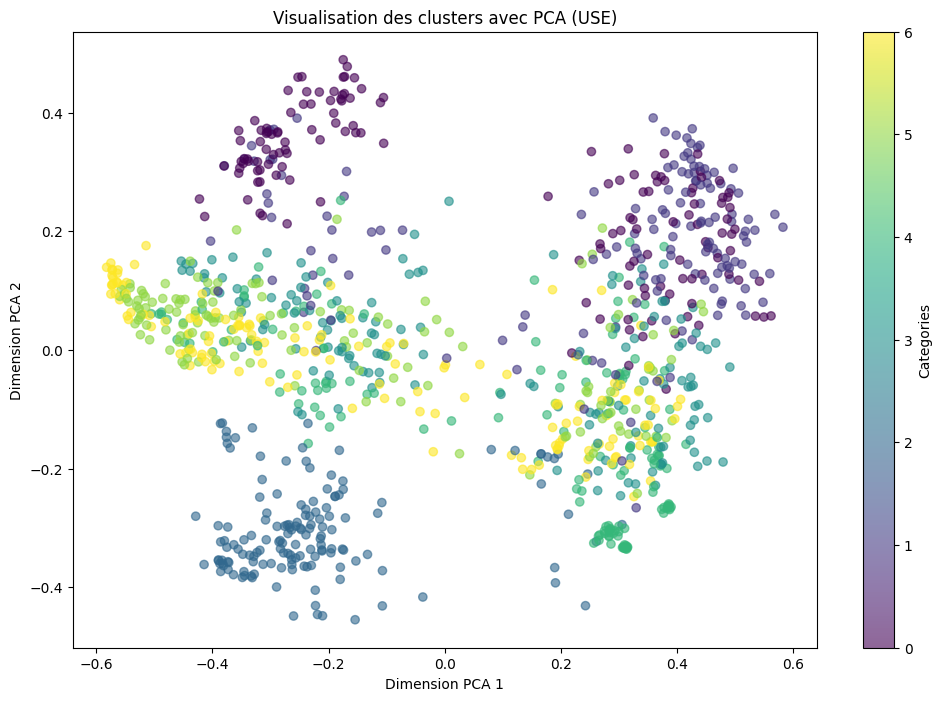

c:\Users\misss\Formation\Projets\Classification\ClassifiezAutomatiquement\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


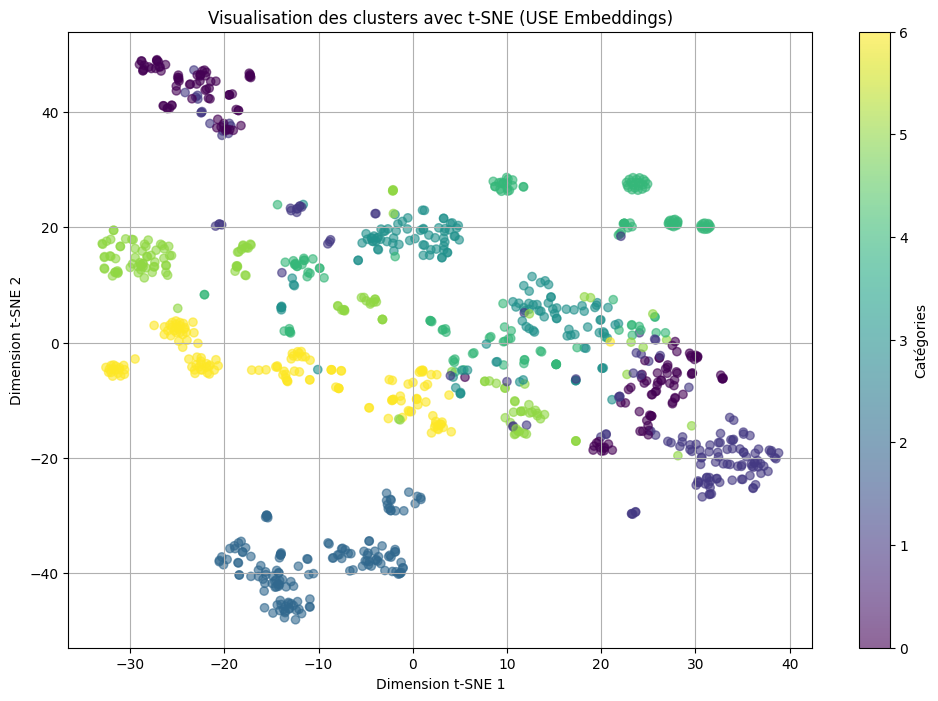

In [61]:
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)

# Visualisation avec PCA en 2D
pca_2d = PCA(n_components=2)
embeddings_2d = pca_2d.fit_transform(embeddings_pca)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=df_text['category'].factorize()[0], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Categories')
plt.title("Visualisation des clusters avec PCA (USE)")
plt.xlabel("Dimension PCA 1")
plt.ylabel("Dimension PCA 2")
plt.show()

# Réduction avec t-SNE à partir des données PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

# Visualisation avec t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    embeddings_tsne[:, 0], 
    embeddings_tsne[:, 1], 
    c=df_text['category'].factorize()[0], 
    cmap='viridis', 
    alpha=0.6
)

# Ajouter une légende et des labels d'axes
plt.colorbar(scatter, label='Catégories')
plt.title('Visualisation des clusters avec t-SNE (USE Embeddings)')
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.grid(True)
plt.show()

In [32]:
# Définir le nombre de clusters en fonction du nombre de catégories uniques
num_categories = df_text['category'].nunique()

kmeans = KMeans(n_clusters=num_categories, random_state=42)
df_text['cluster'] = kmeans.fit_predict(embeddings_pca)


ari_score = adjusted_rand_score(df_text['category'], df_text['cluster'])
silhouette_avg = silhouette_score(embeddings_pca, df_text['cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")


Adjusted Rand Index (ARI): 0.3195
Silhouette Score: 0.1627


# Images

In [33]:
# Ajouter '.jpg' à la colonne 'uniq_id' dans df_text pour correspondre à 'file_name' dans df_images
df_text['file_name'] = df_text['uniq_id'] + '.jpg'

# Fusionner les deux DataFrames en utilisant 'file_name' comme clé
df_images = df_images.merge(df_text[['file_name', 'category']], on='file_name', how='left')

# Afficher les premières lignes pour vérifier la fusion
df_images.head()

file_name  \
0  009099b1f6e1e8f893ec29a7023153c4.jpg   
1  0096e89cc25a8b96fb9808716406fe94.jpg   
2  00cbbc837d340fa163d11e169fbdb952.jpg   
3  00d84a518e0550612fcfcba3b02b6255.jpg   
4  00e966a5049a262cfc72e6bbf68b80e7.jpg   

                                               image                  category  
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...                   Watches  
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...          Kitchen & Dining  
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...           Home Furnishing  
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  Beauty and Personal Care  
4  [[[254, 254, 252], [254, 254, 252], [254, 254,...                 Computers

In [34]:
df_images

file_name  \
0    009099b1f6e1e8f893ec29a7023153c4.jpg   
1    0096e89cc25a8b96fb9808716406fe94.jpg   
2    00cbbc837d340fa163d11e169fbdb952.jpg   
3    00d84a518e0550612fcfcba3b02b6255.jpg   
4    00e966a5049a262cfc72e6bbf68b80e7.jpg   
..                                    ...   
272  eaed0897074ee52230ff6c6d73c18dd4.jpg   
273  f0bc8dff0e2ef0b75f1c78b4f67bcd63.jpg   
274  f41761a931135c6c043c7e04abda41b0.jpg   
275  f7514f6068377bcaed80043a5e321131.jpg   
276  fb733e04ff2d72c59d8513eb574e81a2.jpg   

                                                 image  \
0    [[[255, 255, 255], [255, 255, 255], [255, 255,...   
1    [[[255, 255, 255], [255, 255, 255], [255, 255,...   
2    [[[255, 255, 255], [255, 255, 255], [255, 255,...   
3    [[[255, 255, 255], [255, 255, 255], [255, 255,...   
4    [[[254, 254, 252], [254, 254, 252], [254, 254,...   
..                                                 ...   
272  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
273  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
274  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
275  [[[255, 255, 255], [255, 255, 255], [255, 255,...   
276  [[[255, 255, 255], [255, 255, 255], [255, 255,...   

                     category  
0                     Watches  
1            Kitchen & Dining  
2             Home Furnishing  
3    Beauty and Personal Care  
4                   Computers  
..                        ...  
272                 Baby Care  
273           Home Furnishing  
274           Home Furnishing  
275                 Baby Care  
276          Kitchen & Dining  

[277 rows x 3 columns]

In [35]:
# Supprimer les lignes où la colonne 'image' contient des valeurs NaN
df_images = df_images.dropna(subset=['image'])

# Vérifier le nombre de lignes restantes
print(f"Nombre de lignes restantes dans df_images: {len(df_images)}")

Nombre de lignes restantes dans df_images: 277


In [36]:
from sklearn.preprocessing import LabelEncoder

# Encoder les catégories en valeurs numériques
label_encoder = LabelEncoder()
df_images['true_labels'] = label_encoder.fit_transform(df_images['category'])




### Export csv pour la classification suppervisée

In [37]:

df_transformed = pd.DataFrame({
    'image_path': df_images['file_name'],  
    'label_name': df_images['category'],  
    'label': df_images['true_labels']   
})


output_path = 'data/images.csv'
df_transformed.to_csv(output_path, index=False)

print(f"Le fichier a été exporté sous le nom : {output_path}")

Le fichier a été exporté sous le nom : data/images.csv


### Preprocessing des images

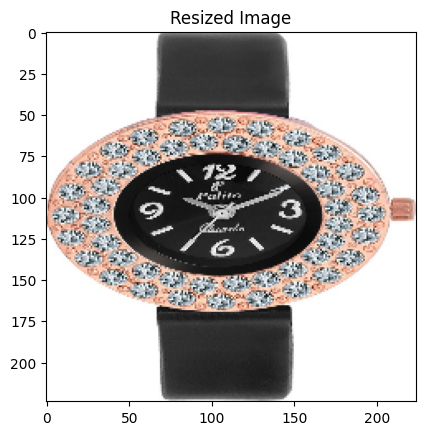

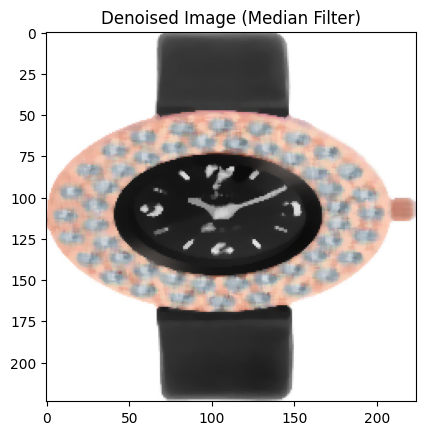

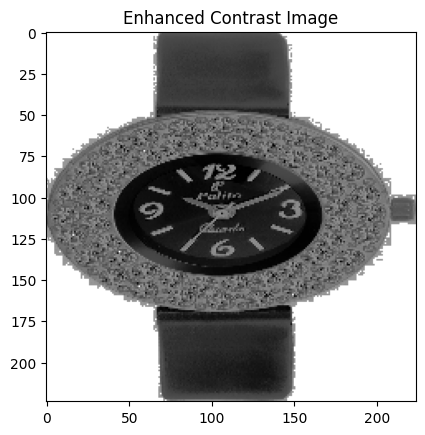

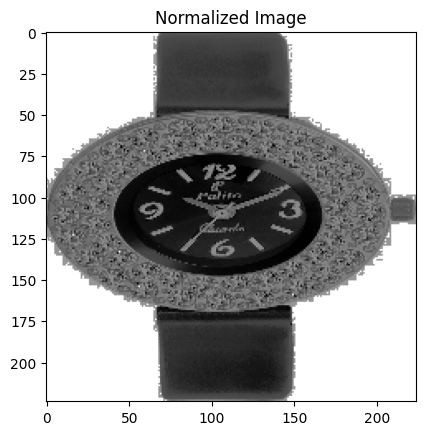

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction de traitement des images
def preprocess_image(image_array, display_first=False):
    # S'assurer que l'image est un tableau NumPy
    if not isinstance(image_array, np.ndarray):
        print("L'image n'est pas un tableau NumPy. Ignorée.")
        return None
    
    # Remplacer les NaN par une valeur neutre (par exemple, 0)
    image_array = np.nan_to_num(image_array, nan=0.0)
    
    # Clip les valeurs pour être dans la plage [0, 255]
    image_array = np.clip(image_array, 0, 255).astype(np.uint8)
    
    # Redimensionnement
    image_resized = cv2.resize(image_array, (224, 224)).astype(np.uint8)
    if display_first:
        plt.imshow(image_resized)
        plt.title("Resized Image")
        plt.show()

    # Application d'un filtre médian pour réduire le bruit blanc
    image_denoised = cv2.medianBlur(image_resized, 5)  # taille de kernel 5
    if display_first:
        plt.imshow(image_denoised)
        plt.title("Denoised Image (Median Filter)")
        plt.show()
        
    # Conversion en niveaux de gris si l'image est en couleur
    if len(image_resized.shape) == 3 and image_resized.shape[2] == 3:
        image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_resized  # Déjà en niveaux de gris

    # Application d'un filtre de contraste
    image_enhanced = cv2.equalizeHist(image_gray)
    if display_first:
        plt.imshow(image_enhanced, cmap='gray')
        plt.title("Enhanced Contrast Image")
        plt.show()

    # Normalisation entre 0 et 1 puis conversion en uint8
    image_normalized = (image_enhanced / 255.0 * 255).astype(np.uint8)
    if display_first:
        plt.imshow(image_normalized, cmap='gray')
        plt.title("Normalized Image")
        plt.show()

    return image_normalized

# Appliquer le prétraitement à chaque image
df_images['processed_image'] = df_images['image'].apply(lambda x: preprocess_image(x, display_first=(x is df_images['image'].iloc[0])))


In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

def kmeans_clustering_with_metrics(features, true_labels, n_clusters, n_components=0.99):
    
    # Réduction de dimensionnalité avec PCA
    pca = PCA(n_components=n_components)
    
    reduced_features = pca.fit_transform(features)
    print(reduced_features.shape)
    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(reduced_features)
    
    # Calcul des scores globaux ARI et Silhouette
    ari_score = adjusted_rand_score(true_labels, predicted_labels)
    silhouette_avg = silhouette_score(reduced_features, predicted_labels)
    
    # Résultats
    results = {
        "ARI": ari_score,
        "Silhouette": silhouette_avg,
        "Predicted Labels": predicted_labels,
        "Reduced Features": reduced_features
    }
    
    # Affichage des scores
    print(f"ARI (Global): {ari_score}")
    print(f"Silhouette Score (Global): {silhouette_avg}")
    
    return results


In [40]:
# Ensure the 'afficher_projection' function is defined as follows (replace 'method_name' with the desired method name):
def afficher_projection(X, y, method_name):
    # PCA Visualization
    pca = PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)
    df_images['PCA_1'] = X_pca[:, 0]
    df_images['PCA_2'] = X_pca[:, 1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA_1', y='PCA_2', hue=y, palette='viridis', data=df_images)
    plt.title(f"Projection PCA des embeddings - {method_name}")
    plt.xlabel("Composante PCA 1")
    plt.ylabel("Composante PCA 2")
    plt.legend(title="Catégorie")
    plt.show()

    # t-SNE Visualization
    tsne = TSNE(n_components=2, perplexity=30, random_state=0)
    X_tsne = tsne.fit_transform(X)
    df_images['TSNE_1'] = X_tsne[:, 0]
    df_images['TSNE_2'] = X_tsne[:, 1]
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='TSNE_1', y='TSNE_2', hue=y, palette='viridis', data=df_images)
    plt.title(f"Projection T-SNE des embeddings - {method_name}")
    plt.xlabel("Composante T-SNE 1")
    plt.ylabel("Composante T-SNE 2")
    plt.legend(title="Catégorie")
    plt.show()




## Sift


In [41]:
import cv2
import numpy as np

def extract_sift_features(image):
    """
    Extrait des descripteurs SIFT pour une image.
    
    Paramètres :
    - image : numpy array, image traitée en niveaux de gris.
    
    Retourne :
    - Descripteurs SIFT sous forme d'un vecteur.
    """
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    
    if descriptors is not None:
        # Retourner la moyenne des descripteurs pour simplifier le vecteur
        return np.mean(descriptors, axis=0)
    else:
        # Si aucun descripteur n'a été trouvé, retourner un vecteur nul
        return np.zeros((128,))  # SIFT utilise généralement des descripteurs de longueur 128

# Appliquer l'extraction de features SIFT à chaque image
df_images['sift_features'] = df_images['processed_image'].apply(extract_sift_features)

# Retirer les images qui n'ont pas de descripteurs valides
df_images = df_images[df_images['sift_features'].apply(lambda x: x is not None)]


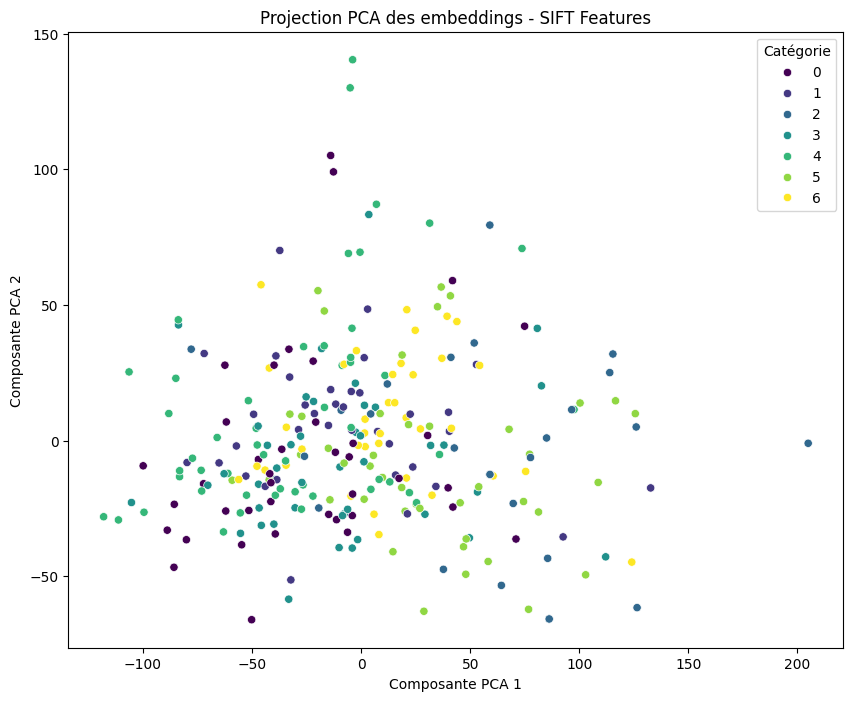

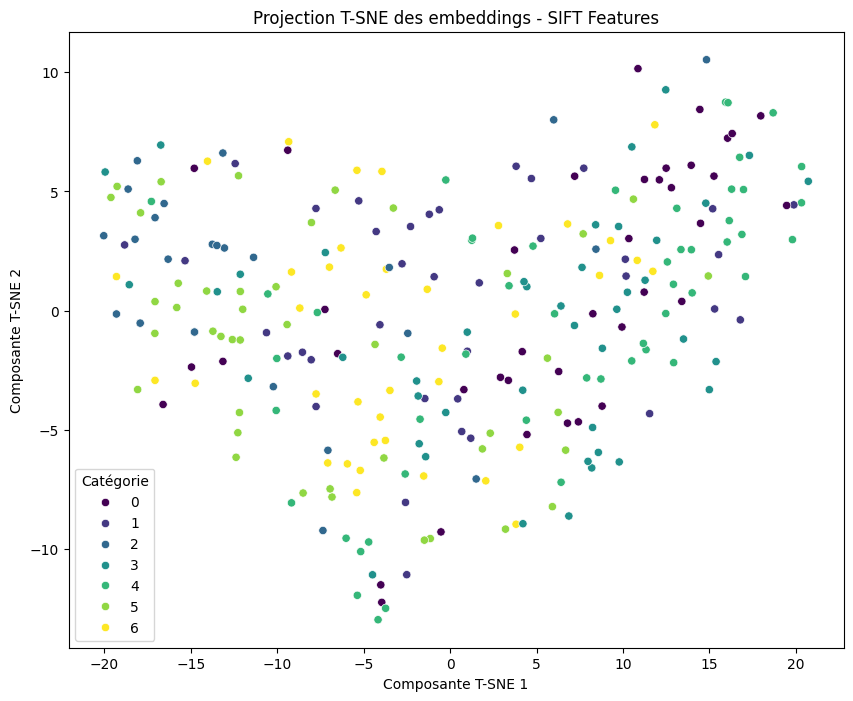

In [42]:
# After extracting SIFT features
all_features = np.stack(df_images['sift_features'].values)

# Encode the labels for visualization
label_encoder = LabelEncoder()
df_images['true_labels'] = label_encoder.fit_transform(df_images['category'])

# Call the visualization function
afficher_projection(all_features, df_images['true_labels'], "SIFT Features")


In [ ]:
n_clusters = len(np.unique(df_images['true_labels']))
results = kmeans_clustering_with_metrics(
    features=all_features,
    true_labels=df_images['true_labels'].values,
    n_clusters=n_clusters,
    n_components=0.99 # Utilisation de 2 dimensions pour la réduction PCA
)


(277, 50)
ARI (Global): 0.04284308995743279
Silhouette Score (Global): 0.12895359098911285
ARI (Global): 0.04284308995743279
Silhouette Score (Global): 0.12895359


## VGG16

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical



In [45]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [46]:

# Function to process and extract features from a single image
def extract_features(image_array):
    image = cv2.resize(image_array, (224, 224))
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    features = model.predict(image)
    return features.flatten()

# Apply feature extraction to each image
df_images['vgg16_features'] = df_images['image'].apply(lambda x: extract_features(x) if x is not np.nan else np.nan)

c:\Users\misss\Formation\Projets\Classification\ClassifiezAutomatiquement\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

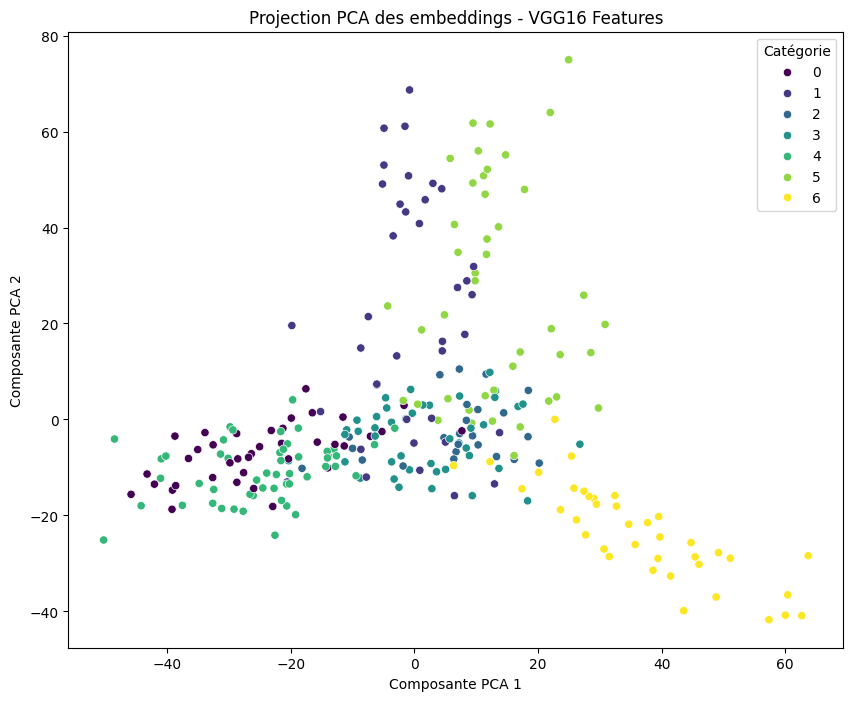

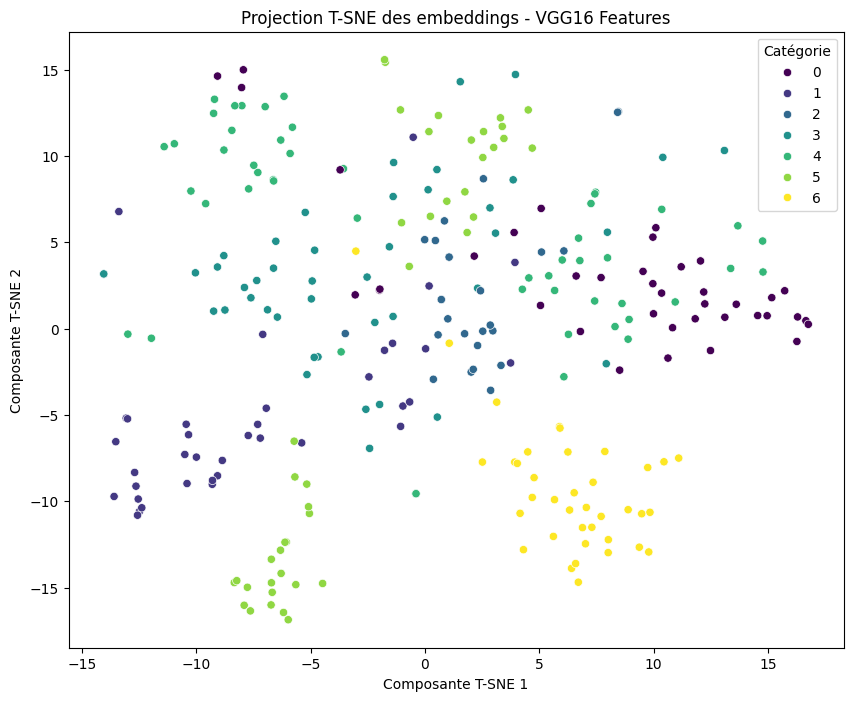

In [47]:
# Retirer les images qui n'ont pas de descripteurs valides
df_images = df_images[df_images['vgg16_features'].apply(lambda x: x is not None)]

# After extracting SIFT features
all_features = np.stack(df_images['vgg16_features'].values)

# Call the visualization function
afficher_projection(all_features, df_images['true_labels'], "VGG16 Features")

In [ ]:
n_clusters = len(np.unique(df_images['true_labels']))
results = kmeans_clustering_with_metrics(
    features=all_features,
    true_labels=df_images['true_labels'].values,
    n_clusters=n_clusters,
    n_components=0.99 
)



(277, 245)
ARI (Global): 0.297737051208128
Silhouette Score (Global): 0.058260466903448105
ARI (Global): 0.297737051208128
Silhouette Score (Global): 0.058260467


## ORB

In [49]:
import cv2
import numpy as np

def extract_orb_features(image_array, max_features=500):
    # Convertir en niveaux de gris si nécessaire
    if len(image_array.shape) == 3:
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    

    descriptor = cv2.ORB_create(nfeatures=max_features)


    
    keypoints, descriptors = descriptor.detectAndCompute(image_array, None)

    
    if descriptors is None:
        return np.zeros((max_features, 32))

    
    if descriptors.shape[0] < max_features:
        padding = np.zeros((max_features - descriptors.shape[0], descriptors.shape[1]))
        descriptors = np.vstack((descriptors, padding))
    elif descriptors.shape[0] > max_features:
        descriptors = descriptors[:max_features, :]
    
    return descriptors.flatten() 


In [50]:
df_images['orb_features'] = df_images['image'].apply(lambda x: extract_orb_features(x) if x is not np.nan else np.nan)



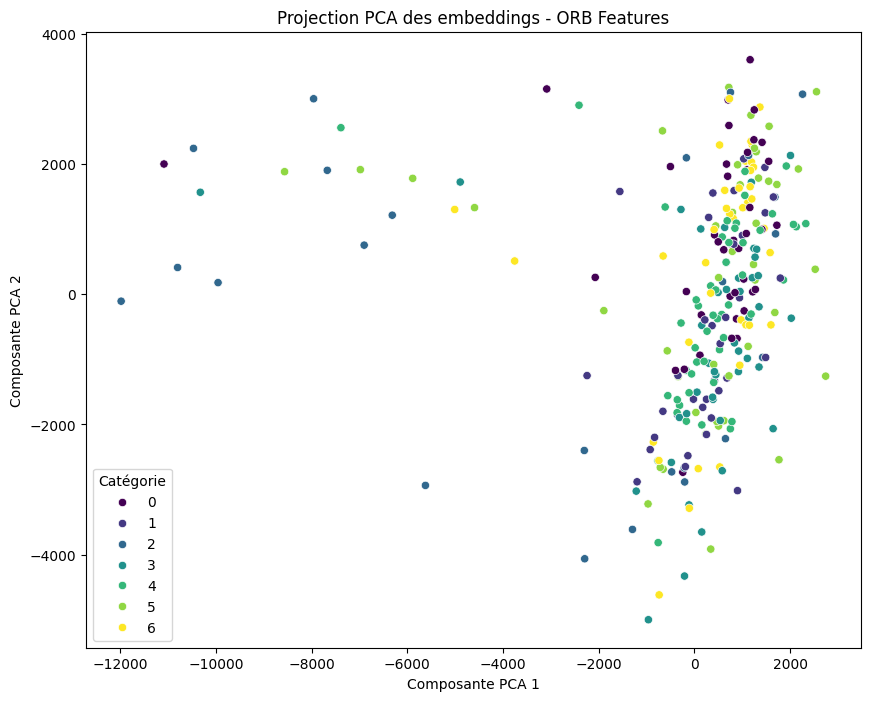

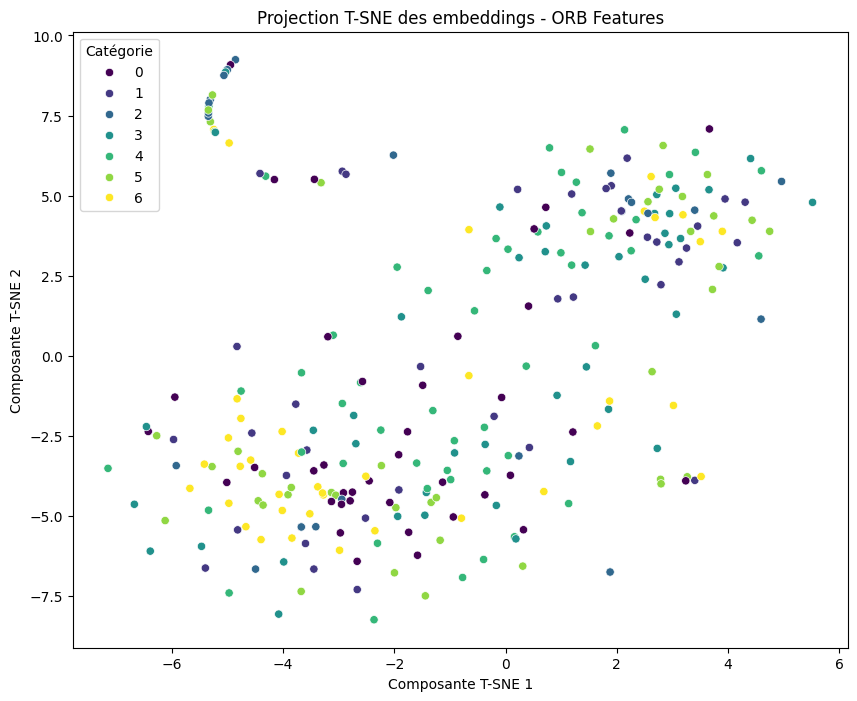

In [51]:
# Retirer les images qui n'ont pas de descripteurs valides
df_images = df_images[df_images['orb_features'].apply(lambda x: x is not None)]

# After extracting SIFT features
all_features = np.stack(df_images['orb_features'].values)

# Call the visualization function
afficher_projection(all_features, df_images['true_labels'], "ORB Features")

In [ ]:
n_clusters = len(np.unique(df_images['true_labels']))
results = kmeans_clustering_with_metrics(
    features=all_features,
    true_labels=df_images['true_labels'].values,
    n_clusters=n_clusters,
    n_components=0.99 # Utilisation de 2 dimensions pour la réduction PCA
)



(277, 269)
ARI (Global): 0.022733115744038638
Silhouette Score (Global): 0.01911890167021145
ARI (Global): 0.022733115744038638
Silhouette Score (Global): 0.01911890167021145
